In [14]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [15]:
input_video = 'mosquito_data/many-mosquitoes-flying-white-bg.mp4'

### Display Video in Notebook

In [16]:
ipd.Video(filename=input_video, width=700)

### Open the Video and Read Metadata

In [17]:
# Load in video capture
cap = cv2.VideoCapture(input_video)

In [18]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

876.0

In [19]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 540.0, Width 960.0


In [20]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 25.00


In [21]:
cap.release()

### Pulling in Images from Video

In [22]:
cap = cv2.VideoCapture(input_video)
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (540, 960, 3)


In [23]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

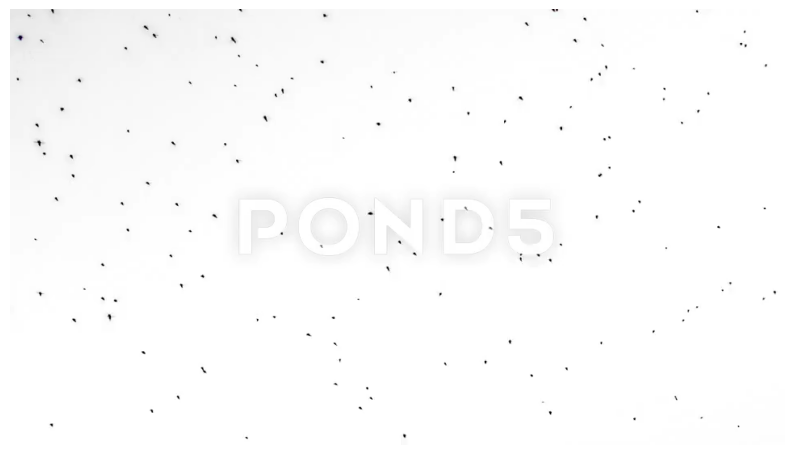

In [24]:
display_cv2_img(img)

In [25]:
cap.release()

### Display multiple frames from the video

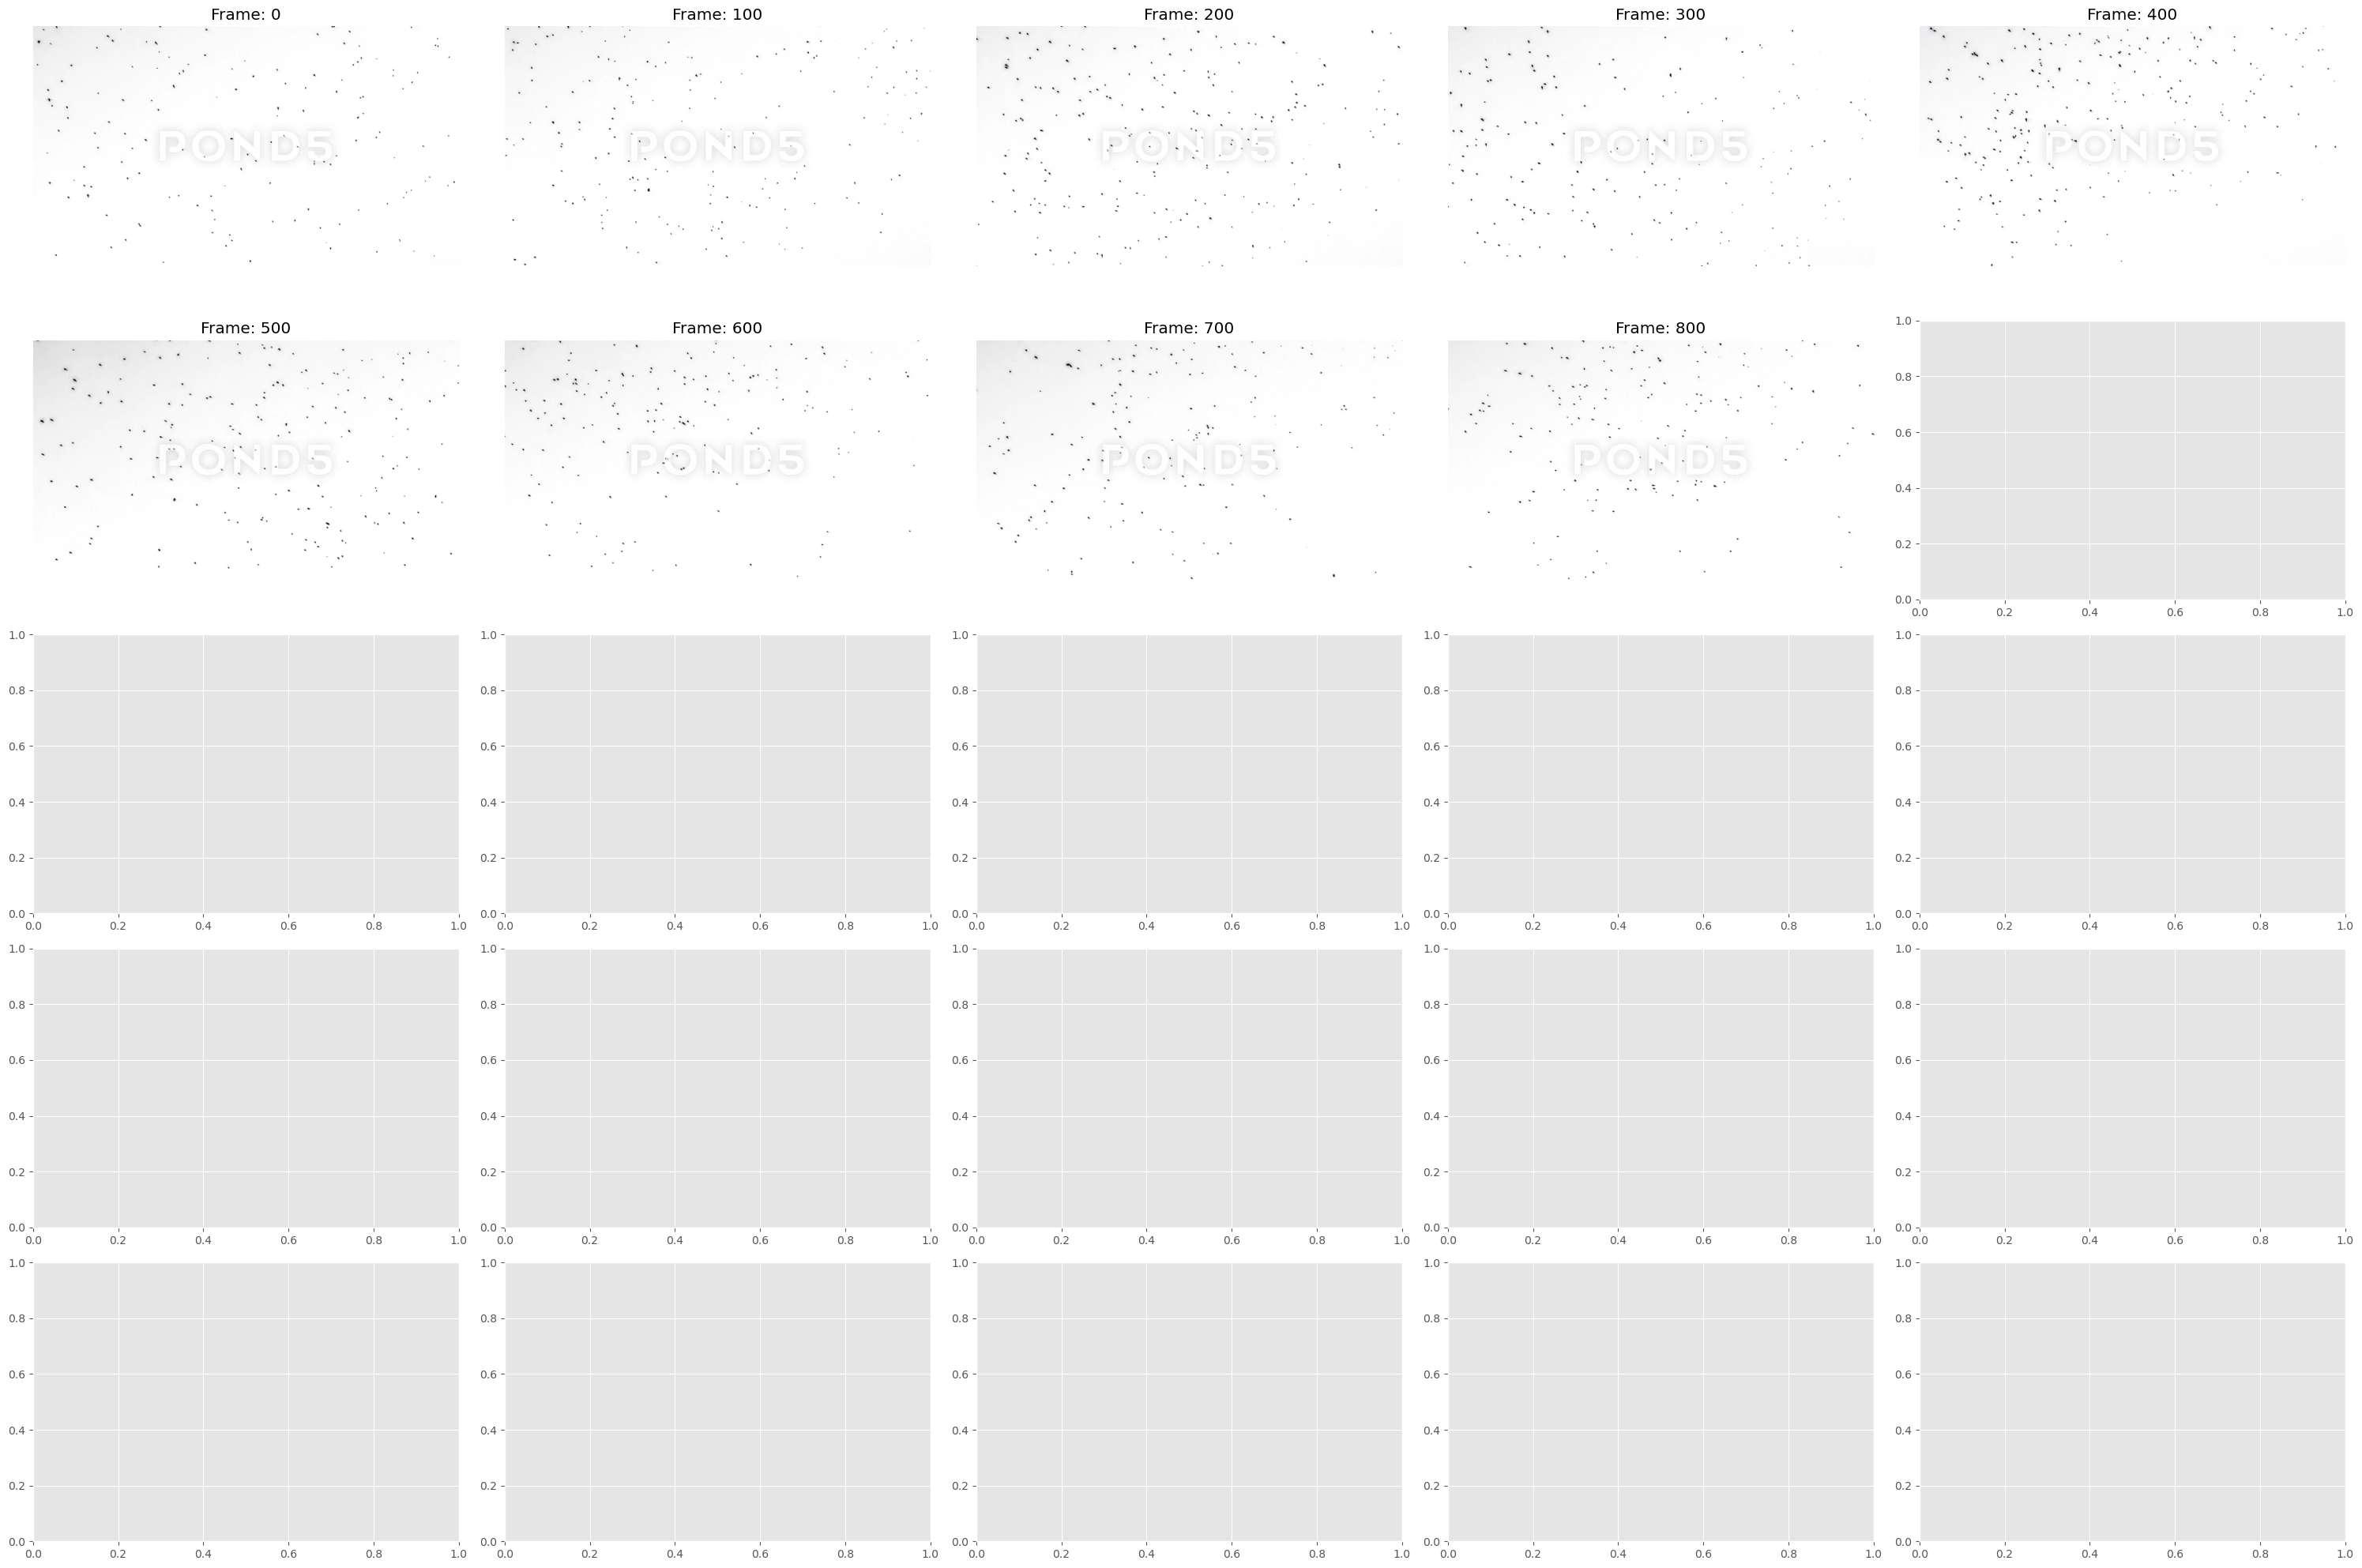

In [26]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture(input_video)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()